In [1]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\files\Downloads\dataset.csv")
df

VIN (1-10)     County           City State  Postal Code  Model Year  \
0       JTMEB3FV6N     Monroe       Key West    FL        33040        2022   
1       1G1RD6E45D      Clark       Laughlin    NV        89029        2013   
2       JN1AZ0CP8B     Yakima         Yakima    WA        98901        2011   
3       1G1FW6S08H     Skagit       Concrete    WA        98237        2017   
4       3FA6P0SU1K  Snohomish        Everett    WA        98201        2019   
...            ...        ...            ...   ...          ...         ...   
112629  7SAYGDEF2N       King         Duvall    WA        98019        2022   
112630  1N4BZ1CP7K   San Juan  Friday Harbor    WA        98250        2019   
112631  1FMCU0KZ4N       King         Vashon    WA        98070        2022   
112632  KNDCD3LD4J       King      Covington    WA        98042        2018   
112633  YV4BR0CL8N       King      Covington    WA        98042        2022   

             Make       Model                   Electric Vehicle Type  \
0          TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1       CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2          NISSAN        LEAF          Battery Electric Vehicle (BEV)   
3       CHEVROLET     BOLT EV          Battery Electric Vehicle (BEV)   
4            FORD      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
...           ...         ...                                     ...   
112629      TESLA     MODEL Y          Battery Electric Vehicle (BEV)   
112630     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
112631       FORD      ESCAPE  Plug-in Hybrid Electric Vehicle (PHEV)   
112632        KIA        NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   
112633      VOLVO        XC90  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              42   
1                 Clean Alternative Fuel Vehicle Eligible              38   
2                 Clean Alternative Fuel Vehicle Eligible              73   
3                 Clean Alternative Fuel Vehicle Eligible             238   
4                   Not eligible due to low battery range              26   
...                                                   ...             ...   
112629  Eligibility unknown as battery range has not b...               0   
112630            Clean Alternative Fuel Vehicle Eligible             150   
112631            Clean Alternative Fuel Vehicle Eligible              38   
112632              Not eligible due to low battery range              26   
112633              Not eligible due to low battery range              18   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                   NaN       198968248   
1               0                   NaN         5204412   
2               0                  15.0       218972519   
3               0                  39.0       186750406   
4               0                  38.0         2006714   
...           ...                   ...             ...   
112629          0                  45.0       217955265   
112630          0                  40.0       103663227   
112631          0                  34.0       193878387   
112632          0                  47.0       125039043   
112633          0                  47.0       194673692   

                   Vehicle Location  \
0         POINT (-81.80023 24.5545)   
1       POINT (-114.57245 35.16815)   
2       POINT (-120.50721 46.60448)   
3        POINT (-121.7515 48.53892)   
4       POINT (-122.20596 47.97659)   
...                             ...   
112629  POINT (-121.98609 47.74068)   
112630  POINT (-123.01648 48.53448)   
112631   POINT (-122.4573 47.44929)   
112632  POINT (-122.09124 47.33778)   
112633  POINT (-122.09124 47.33778)   

                                         Electric Utility  2020 Census Tract  


In [3]:
df['Base MSRP'].unique()

array([     0,  31950,  55700,  33950,  69900,  36900,  43700,  34995,
        39995,  32250,  44100, 110950,  59900,  52900,  54950, 102000,
        45600,  53400,  64950, 184400,  90700,  36800,  81100,  75095,
        52650,  91250, 109000,  98950,  89100, 845000], dtype=int64)

In [4]:
# Calculate the mean of 'Base MSRP', excluding 0 values
mean_base_msrp = df['Base MSRP'][df['Base MSRP'] != 0].mean()

# Replace 0 values with the calculated mean in the 'Base MSRP' column
df.loc[df['Base MSRP'] == 0, 'Base MSRP'] = mean_base_msrp

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [6]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987   57517.734909   
std      2648.733064       2.892364      102.334216    4043.549149   
min      1730.000000    1997.000000        0.000000   31950.000000   
25%     98052.000000    2017.000000        0.000000   57517.734909   
50%     98119.000000    2020.000000       32.000000   57517.734909   
75%     98370.000000    2022.000000      208.000000   57517.734909   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08       5.303301e+10  
50%               34.000000    1.923896e+08       5.303303e+10  
75%               43.000000    2.191899e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

### Missing Values

In [8]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

### Imputation

In [9]:
df['Model'] =df['Model'].fillna(df['Model'].mode()[0])

In [10]:
# Use forward fill for 'Legislative District'
df['Legislative District'].fillna(method='ffill', inplace=True)
df['Legislative District'].fillna(method='bfill', inplace=True)

In [11]:
df["Vehicle Location"] = df["Vehicle Location"].fillna(df["Vehicle Location"].mode()[0])

In [12]:
df["Electric Utility"] = df["Electric Utility"].fillna(df["Electric Utility"].mode()[0])

### After Imputation of missing values

In [13]:
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

### Type Casting

In [14]:
# Convert 'Model Year' and 'Postal Code' to object (string) type
df['Model Year'] = df['Model Year'].astype(str)
df['Postal Code'] = df['Postal Code'].astype(str)

# Verify the change in data types
print(df.dtypes)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                           object
Model Year                                            object
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

### Task 1: This is an open ended problem. Apply Exploratory Data Analysis (Univariate and Bivariate) on the dataset available above.

### Uni - Variate

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

def analyze_numerical_columns(dataframe, numerical_columns):
    """
    Analyzes specified numerical columns in a DataFrame.
    
    Parameters:
    - dataframe: The DataFrame containing the data.
    - numerical_columns: List of numerical column names to analyze.
    
    Returns:
    - result_df: DataFrame containing the analysis results for each column.
    """
    # Initialize an empty list to store results
    results = []

    for column in numerical_columns:
        # Calculate statistics
        mean = dataframe[column].mean()
        median = dataframe[column].median()
        variance = dataframe[column].var()
        std_dev = dataframe[column].std()
        min_val = dataframe[column].min()
        max_val = dataframe[column].max()
        kurt = kurtosis(dataframe[column], nan_policy='omit')
        skewness = skew(dataframe[column], nan_policy='omit')
        
        
        # Append results for this column
        results.append({
            'Column': column,
            'Mean': mean,
            'Median': median,
            'Variance': variance,
            'Kurtosis': kurt,
            'Skewness': skewness,
            'Standard Deviation': std_dev,
            'Min': min_val,
            'Max': max_val,
            
            
        })

    # Convert results to a DataFrame for better visualization
    result_df = pd.DataFrame(results)
    return result_df



# Specify numerical columns to analyze
numerical_columns = df.select_dtypes(include=[int, float]).columns.tolist()
# Analyze the numerical columns
results_df = analyze_numerical_columns(df, numerical_columns)

results_df = results_df.round(2)

# Display the results
results_df

Column          Mean        Median      Variance  Kurtosis  \
0        Electric Range  8.781000e+01  3.200000e+01  1.047229e+04     -0.88   
1             Base MSRP  5.751773e+04  5.751773e+04  1.635029e+07  12898.31   
2  Legislative District  2.980000e+01  3.400000e+01  2.161200e+02     -0.98   
3        DOL Vehicle ID  1.994567e+08  1.923896e+08  8.833043e+15      2.47   
4     2020 Census Tract  5.296650e+10  5.303303e+10  2.886956e+18    645.87   

   Skewness  Standard Deviation           Min           Max  
0      0.82        1.023300e+02  0.000000e+00  3.370000e+02  
1     68.72        4.043550e+03  3.195000e+04  8.450000e+05  
2     -0.54        1.470000e+01  1.000000e+00  4.900000e+01  
3      1.15        9.398427e+07  4.777000e+03  4.792548e+08  
4    -25.01        1.699104e+09  1.101001e+09  5.603300e+10

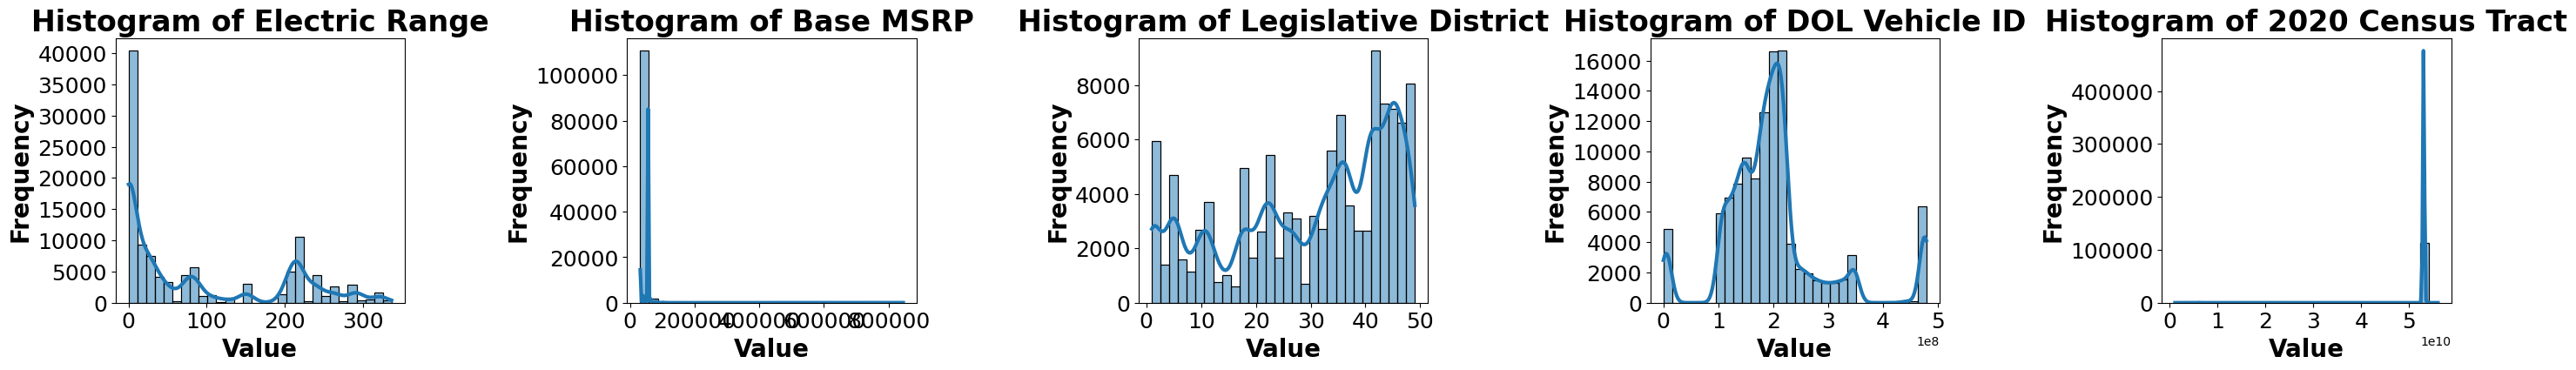

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns



# Step 2: Histograms
num_cols = len(numerical_cols)
num_rows = (num_cols // 5) + (num_cols % 5 > 0)  # Calculate number of rows needed

# Adjust figure size for better visibility
plt.figure(figsize=(30, num_rows * 6))  # Set larger figure size

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 5, i + 1)  # Adjust subplot grid based on the number of columns
    sns.histplot(df[col], bins=30, kde=True, line_kws={'linewidth': 3})  # Use line_kws for KDE line thickness
    
    # Set title and labels with increased font sizes
    plt.title(f'Histogram of {col}', fontsize=24, fontweight='bold')  # Increase title size
    plt.xlabel('Value', fontsize=20, fontweight='bold')  # Increase x-label size
    plt.ylabel('Frequency', fontsize=20, fontweight='bold')  # Increase y-label size

    # Increase tick label sizes
    plt.xticks(fontsize=18)  # x-ticks size
    plt.yticks(fontsize=18)  # y-ticks size

plt.tight_layout(pad=7.0)  # Add padding between subplots for clarity
plt.show()


### Insights

* **Electric Range:** Positively skewed, platykurtic
* **Legislative District:** Mildly negatively skewed, platykurtic
* **DOL Vehicle ID:** Positively skewed, leptokurtic
* **2020 Census Tract:** Highly negatively skewed, extremely leptokurtic
* Overall, the distributions suggest varying degrees of skewness and kurtosis, indicating diverse patterns of data across different variables.

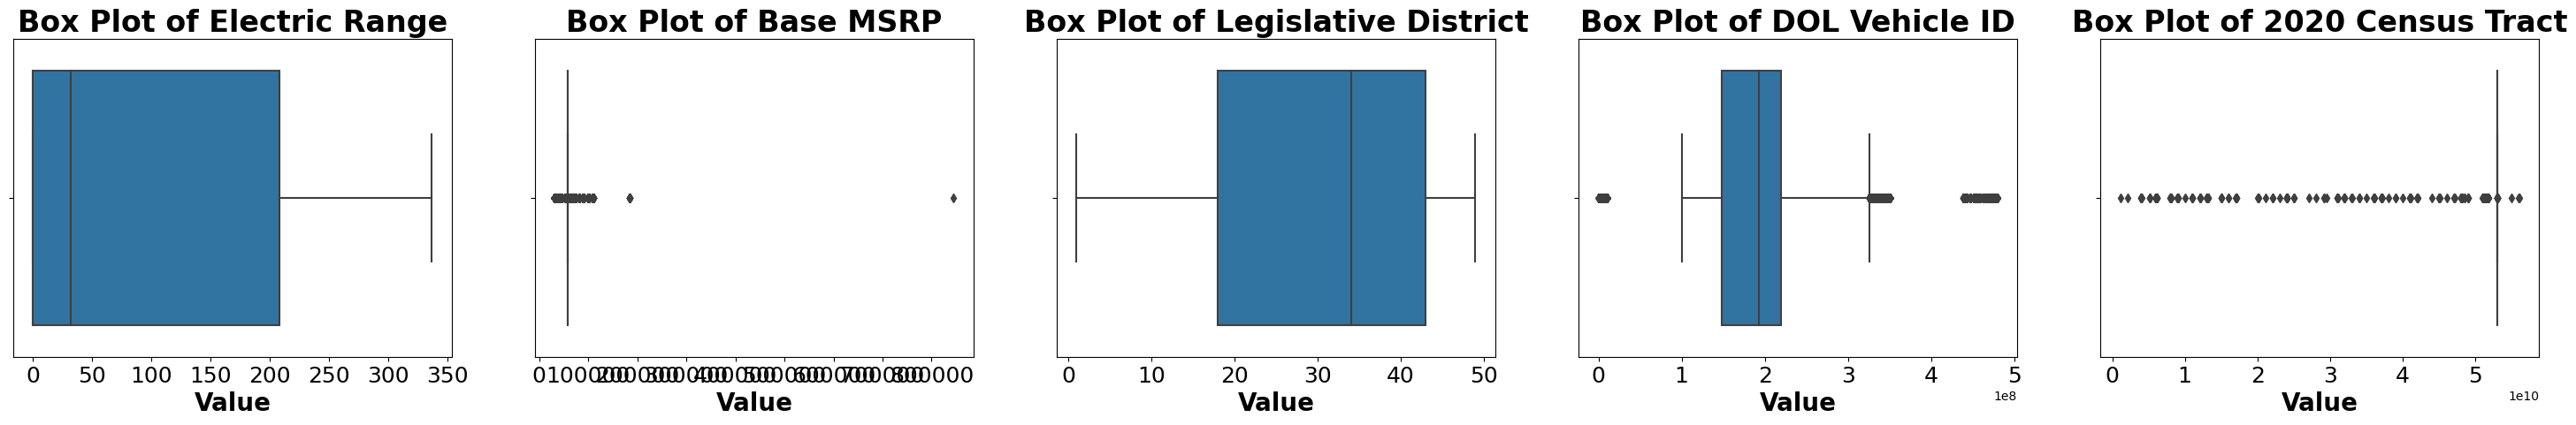

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Box Plots
num_cols = len(numerical_cols)
num_rows = (num_cols // 5) + (num_cols % 5 > 0)  # Calculate number of rows needed

# Adjust figure size for better visibility
plt.figure(figsize=(30, num_rows * 6))  # Set larger figure size

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 5, i + 1)  # Adjust subplot grid based on the number of columns
    sns.boxplot(x=df[col])  # Create a box plot for the numerical column
    
    # Set title and labels with increased font sizes
    plt.title(f'Box Plot of {col}', fontsize=24, fontweight='bold')  # Increase title size
    plt.xlabel('Value', fontsize=20, fontweight='bold')  # Increase x-label size

    # Increase tick label sizes
    plt.xticks(fontsize=18)  # x-ticks size
    plt.yticks(fontsize=18)  # y-ticks size

plt.tight_layout(pad=5.0)  # Add padding between subplots for clarity
plt.show()

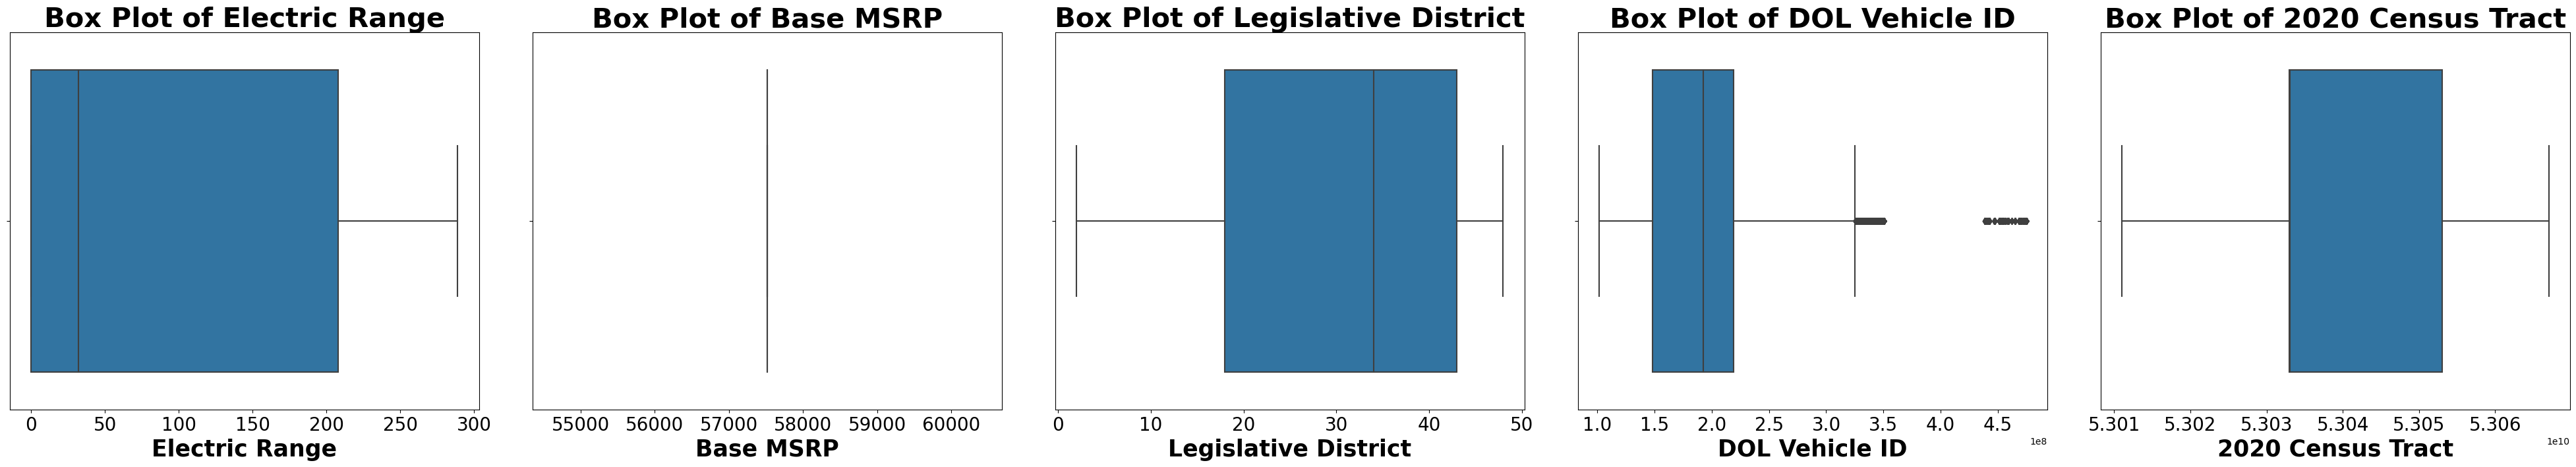

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (assuming you already have your df loaded)
# df = pd.read_csv('your_data.csv')  # Uncomment this line to load your DataFrame

# Function to cap outliers
def cap_outliers_10_percent(series):
    lower_bound = series.quantile(0.05)  # 5th percentile
    upper_bound = series.quantile(0.95)  # 95th percentile
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

# Apply capping to each numerical column
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col] = cap_outliers_10_percent(df[col])

# Step 2: Create Box Plots for Capped Outliers
num_cols = len(numerical_cols)
rows = (num_cols // 5) + (num_cols % 5 > 0)  # Calculate the number of rows needed

plt.figure(figsize=(40, rows * 8))  # Adjust figure size based on the number of rows and increase height
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, 5, i + 1)  # Create subplots based on the calculated number of rows
    sns.boxplot(x=df[col])
    
    # Set title and labels with increased font sizes
    plt.title(f'Box Plot of {col}', fontsize=30, fontweight='bold')  # Increase title size
    plt.xlabel(col, fontsize=25, fontweight='bold')  # Increase x-label size

    # Increase tick label sizes
    plt.xticks(fontsize=20)  # x-ticks size
    plt.yticks(fontsize=20)  # y-ticks size

plt.tight_layout(pad=4.0)  # Adjust spacing to avoid overlap
plt.show()


## Frequency Distribution

In [19]:
import pandas as pd

def analyze_categorical_columns(dataframe, categorical_columns):
    """
    Analyzes specified categorical columns in a DataFrame.
    
    Parameters:
    - dataframe: The DataFrame containing the data.
    - categorical_columns: List of categorical column names to analyze.
    
    Returns:
    - result_df: DataFrame containing the analysis results for each column.
    """
    # Initialize an empty list to store results
    results = []

    for column in categorical_columns:
        # Count of non-null entries
        count = dataframe[column].count()
        
        # Most frequent value
        most_frequent_value = dataframe[column].mode()[0]  # Mode returns a Series
        
        # Value counts
        value_counts = dataframe[column].value_counts().to_dict()  # Convert to dictionary for easier reading
        
        # Number of unique values
        nunique = dataframe[column].nunique()
        
        # Append results for this column
        results.append({
            'Column': column,
            'Count': count,
            'Most Frequent Value': most_frequent_value,
            'Value Counts': value_counts,
            'Number of Unique Values': nunique
        })

    # Convert results to a DataFrame for better visualization
    result_df = pd.DataFrame(results)
    return result_df


# Specify categorical columns to analyze
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Analyze the categorical columns
results_df = analyze_categorical_columns(df, categorical_columns)

# Display the results
results_df


Column   Count  \
0                                          VIN (1-10)  112634   
1                                              County  112634   
2                                                City  112634   
3                                               State  112634   
4                                         Postal Code  112634   
5                                          Model Year  112634   
6                                                Make  112634   
7                                               Model  112634   
8                               Electric Vehicle Type  112634   
9   Clean Alternative Fuel Vehicle (CAFV) Eligibility  112634   
10                                   Vehicle Location  112634   
11                                   Electric Utility  112634   

                              Most Frequent Value  \
0                                      5YJYGDEE9M   
1                                            King   
2                                         Seattle   
3                                              WA   
4                                           98052   
5                                            2022   
6                                           TESLA   
7                                         MODEL 3   
8                  Battery Electric Vehicle (BEV)   
9         Clean Alternative Fuel Vehicle Eligible   
10                    POINT (-122.13158 47.67858)   
11  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)   

                                         Value Counts  Number of Unique Values  
0   {'5YJYGDEE9M': 472, '5YJYGDEE0M': 465, '5YJYGD...                     7548  
1   {'King': 59000, 'Snohomish': 12434, 'Pierce': ...                      165  
2   {'Seattle': 20305, 'Bellevue': 5921, 'Redmond'...                      629  
3   {'WA': 112348, 'CA': 76, 'VA': 36, 'MD': 26, '...                       45  
4   {'98052': 2916, '98033': 2059, '98004': 2001, ...                      773  
5   {'2022': 26530, '2021': 18364, '2018': 14246, ...                       20  
6   {'TESLA': 52078, 'NISSAN': 12880, 'CHEVROLET':...                       34  
7   {'MODEL 3': 23155, 'MODEL Y': 17142, 'LEAF': 1...                      114  
8   {'Battery Electric Vehicle (BEV)': 86044, 'Plu...                        2  
9   {'Clean Alternative Fuel Vehicle Eligible': 58...                        3  
10  {'POINT (-122.13158 47.67858)': 2940, 'POINT (...                      758  
11  {'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA...                       73

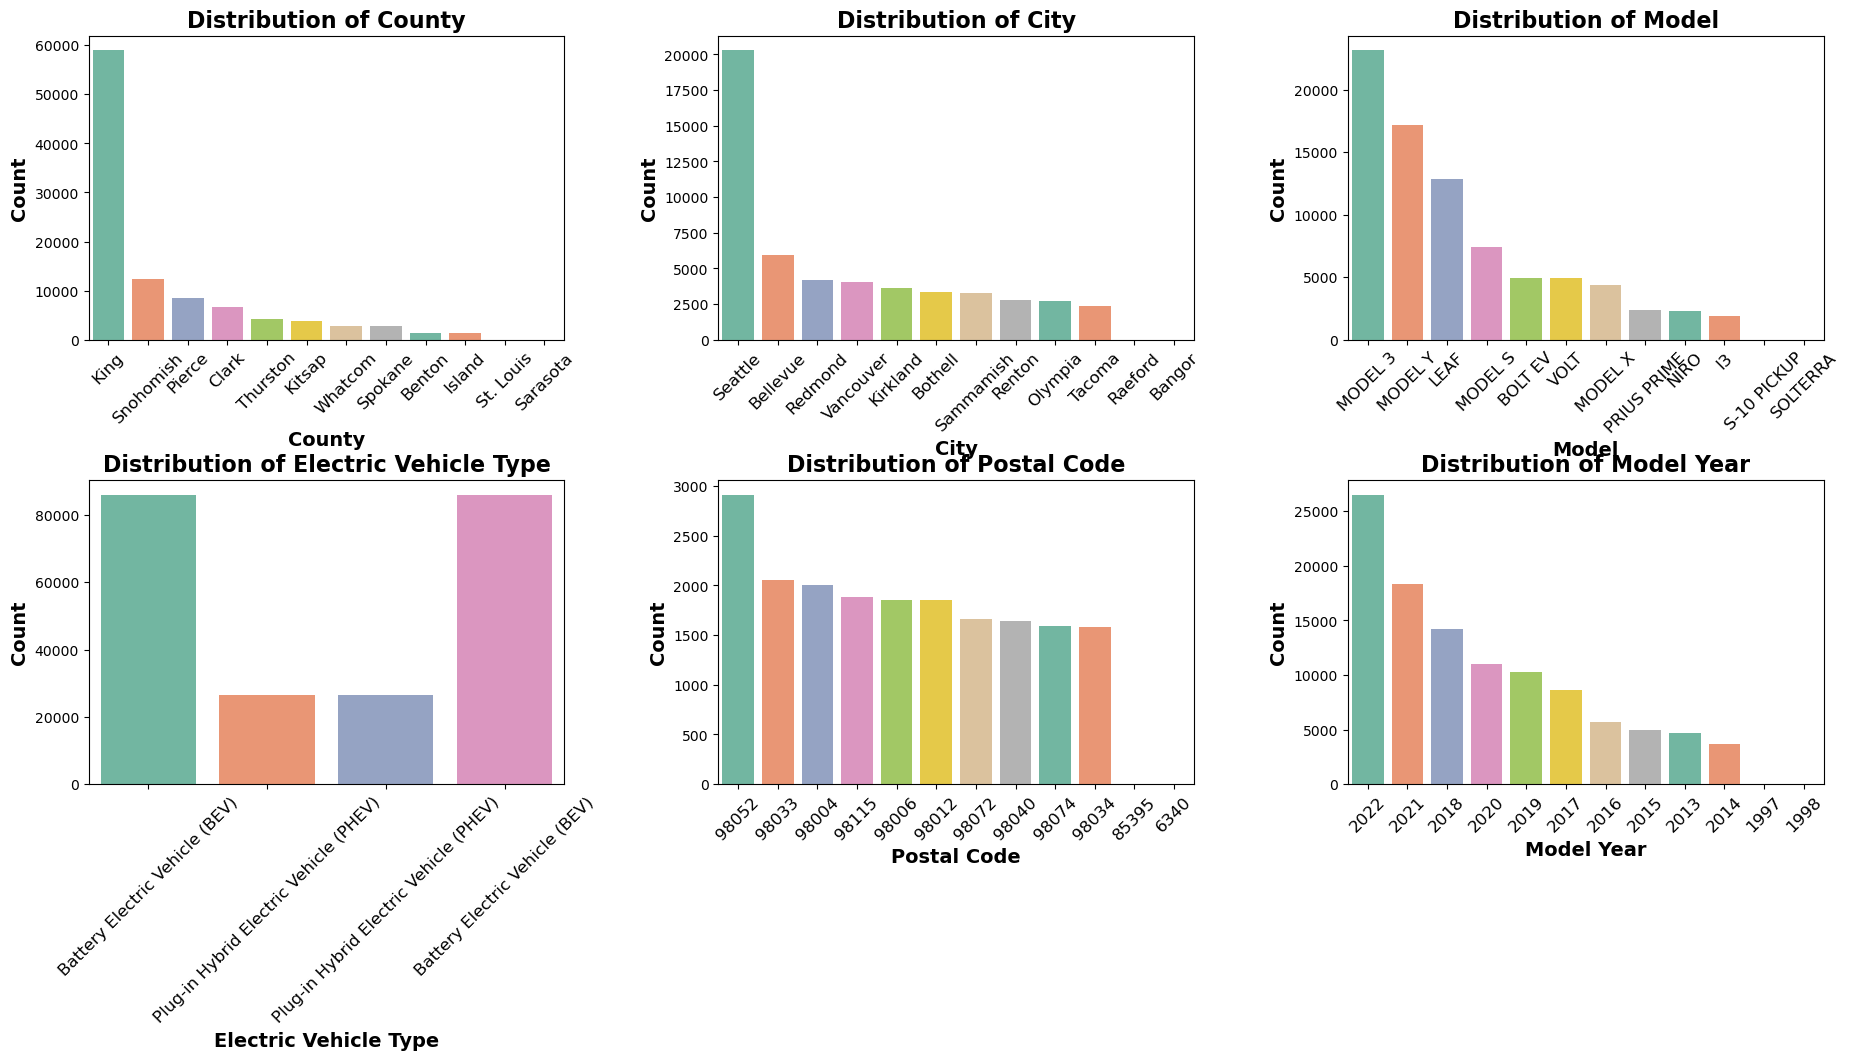

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
categorical_columns = ['County', 'City', 'Model', 'Electric Vehicle Type', 'Postal Code', 'Model Year']

# Define the number of columns per row
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create a figure with a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Adjust size based on rows
fig.subplots_adjust(hspace=0.8, wspace=0.4, top=0.9, bottom=0.1, left=0.1, right=0.9)  # Increased hspace for gap
plt.tight_layout(pad=8.0)  # Add padding between plots

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through categorical columns and plot on each axis
for i, column in enumerate(categorical_columns):
    # Calculate the counts of each category
    counts = df[column].value_counts()
    
    # Get the top 10 and least 2 categories
    top_categories = counts.nlargest(10).index.tolist()
    least_categories = counts.nsmallest(2).index.tolist()
    
    # Combine top 10 and least 2 categories
    selected_categories = top_categories + least_categories

    # Filter the DataFrame for the selected categories
    filtered_data = df[df[column].isin(selected_categories)]

    # Plotting only the selected categories
    sns.countplot(x=filtered_data[column], order=selected_categories, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=16, fontweight='bold')  # Bold title
    axes[i].set_xlabel(column, fontsize=14, fontweight='bold')  # Bold x-axis label
    axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')  # Bold y-axis label
    
    # Adjust the rotation of the x-axis labels and increase their font size
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)  # Increased label size for x-axis

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.show()


### Insights


* **County Dominance:** King County leads with 59,000 electric vehicles, indicating strong market presence, while Snohomish and Pierce follow, suggesting targeted opportunities for growth in other counties.

* **Model Year Trends:** The prevalence of electric vehicles from 2013 and 2014 shows early adoption, while very few older models (1997-2002) indicate a shift toward newer technology.

* **Consumer Behavior:** Concentrated adoption in urban areas may reflect favorable local policies, infrastructure, and socio-economic factors influencing electric vehicle ownership.

* **Geographic Insights:** The data highlights the importance of regional policies in promoting electric vehicle sales, with potential for increased adoption in less represented counties.

## Bivariant Analysis

## Numerical columns vs Numerical Columns

## Spearman Correlation Coefficient 

In [21]:
import pandas as pd
import numpy as np



def spearman_correlation(df):
    # Select numerical columns
    numeric_cols = df.select_dtypes(include=[np.number])
    
    # Calculate Spearman correlation
    corr = numeric_cols.corr(method='spearman')

    # Create a results DataFrame
    results = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Spearman Correlation', 'Relation Strength'])

    # Store results in a list to avoid using append in a loop
    rows = []

    for i in range(len(corr.columns)):
        for j in range(i):
            rows.append({
                'Variable 1': corr.columns[i],
                'Variable 2': corr.columns[j],
                'Spearman Correlation': corr.iloc[i, j],
                'Relation Strength': interpret_strength(corr.iloc[i, j])
            })
    
    # Convert list of rows to DataFrame and concatenate with results
    results = pd.DataFrame(rows)

    return results

def interpret_strength(correlation):
    """Determine the strength of the correlation."""
    if correlation >= 0.7:
        return 'Strong  Relationship'
    elif correlation <= -0.7:
        return 'Strong  Relationship'
    elif correlation >= 0.3:
        return 'Slight  Relationship'
    elif correlation <= -0.3:
        return 'Slight  Relationship'
    else:
        return 'No  Relationship'


# Display the results
spearman_results = spearman_correlation(df)
spearman_results


Variable 1            Variable 2  Spearman Correlation  \
0             Base MSRP        Electric Range                   NaN   
1  Legislative District        Electric Range              0.012087   
2  Legislative District             Base MSRP                   NaN   
3        DOL Vehicle ID        Electric Range             -0.104916   
4        DOL Vehicle ID             Base MSRP                   NaN   
5        DOL Vehicle ID  Legislative District             -0.003429   
6     2020 Census Tract        Electric Range             -0.009075   
7     2020 Census Tract             Base MSRP                   NaN   
8     2020 Census Tract  Legislative District             -0.185916   
9     2020 Census Tract        DOL Vehicle ID              0.008337   

  Relation Strength  
0  No  Relationship  
1  No  Relationship  
2  No  Relationship  
3  No  Relationship  
4  No  Relationship  
5  No  Relationship  
6  No  Relationship  
7  No  Relationship  
8  No  Relationship  
9  No  Relationship

### Insights

* **Electric Range with Other Variables:** Very weak correlations with Legislative District (0.024), DOL Vehicle ID (0.010), and 2020 Census Tract (0.001), indicating negligible relationships.

* **Base MSRP with Other Variables: Weak correlations with Legislative District (0.013), DOL Vehicle ID (0.000), and 2020 Census Tract (0.001), showing no significant associations.

* **DOL Vehicle ID & 2020 Census Tract:** Almost no correlation (-0.002 and 0.003, respectively).

## Scatter Plot

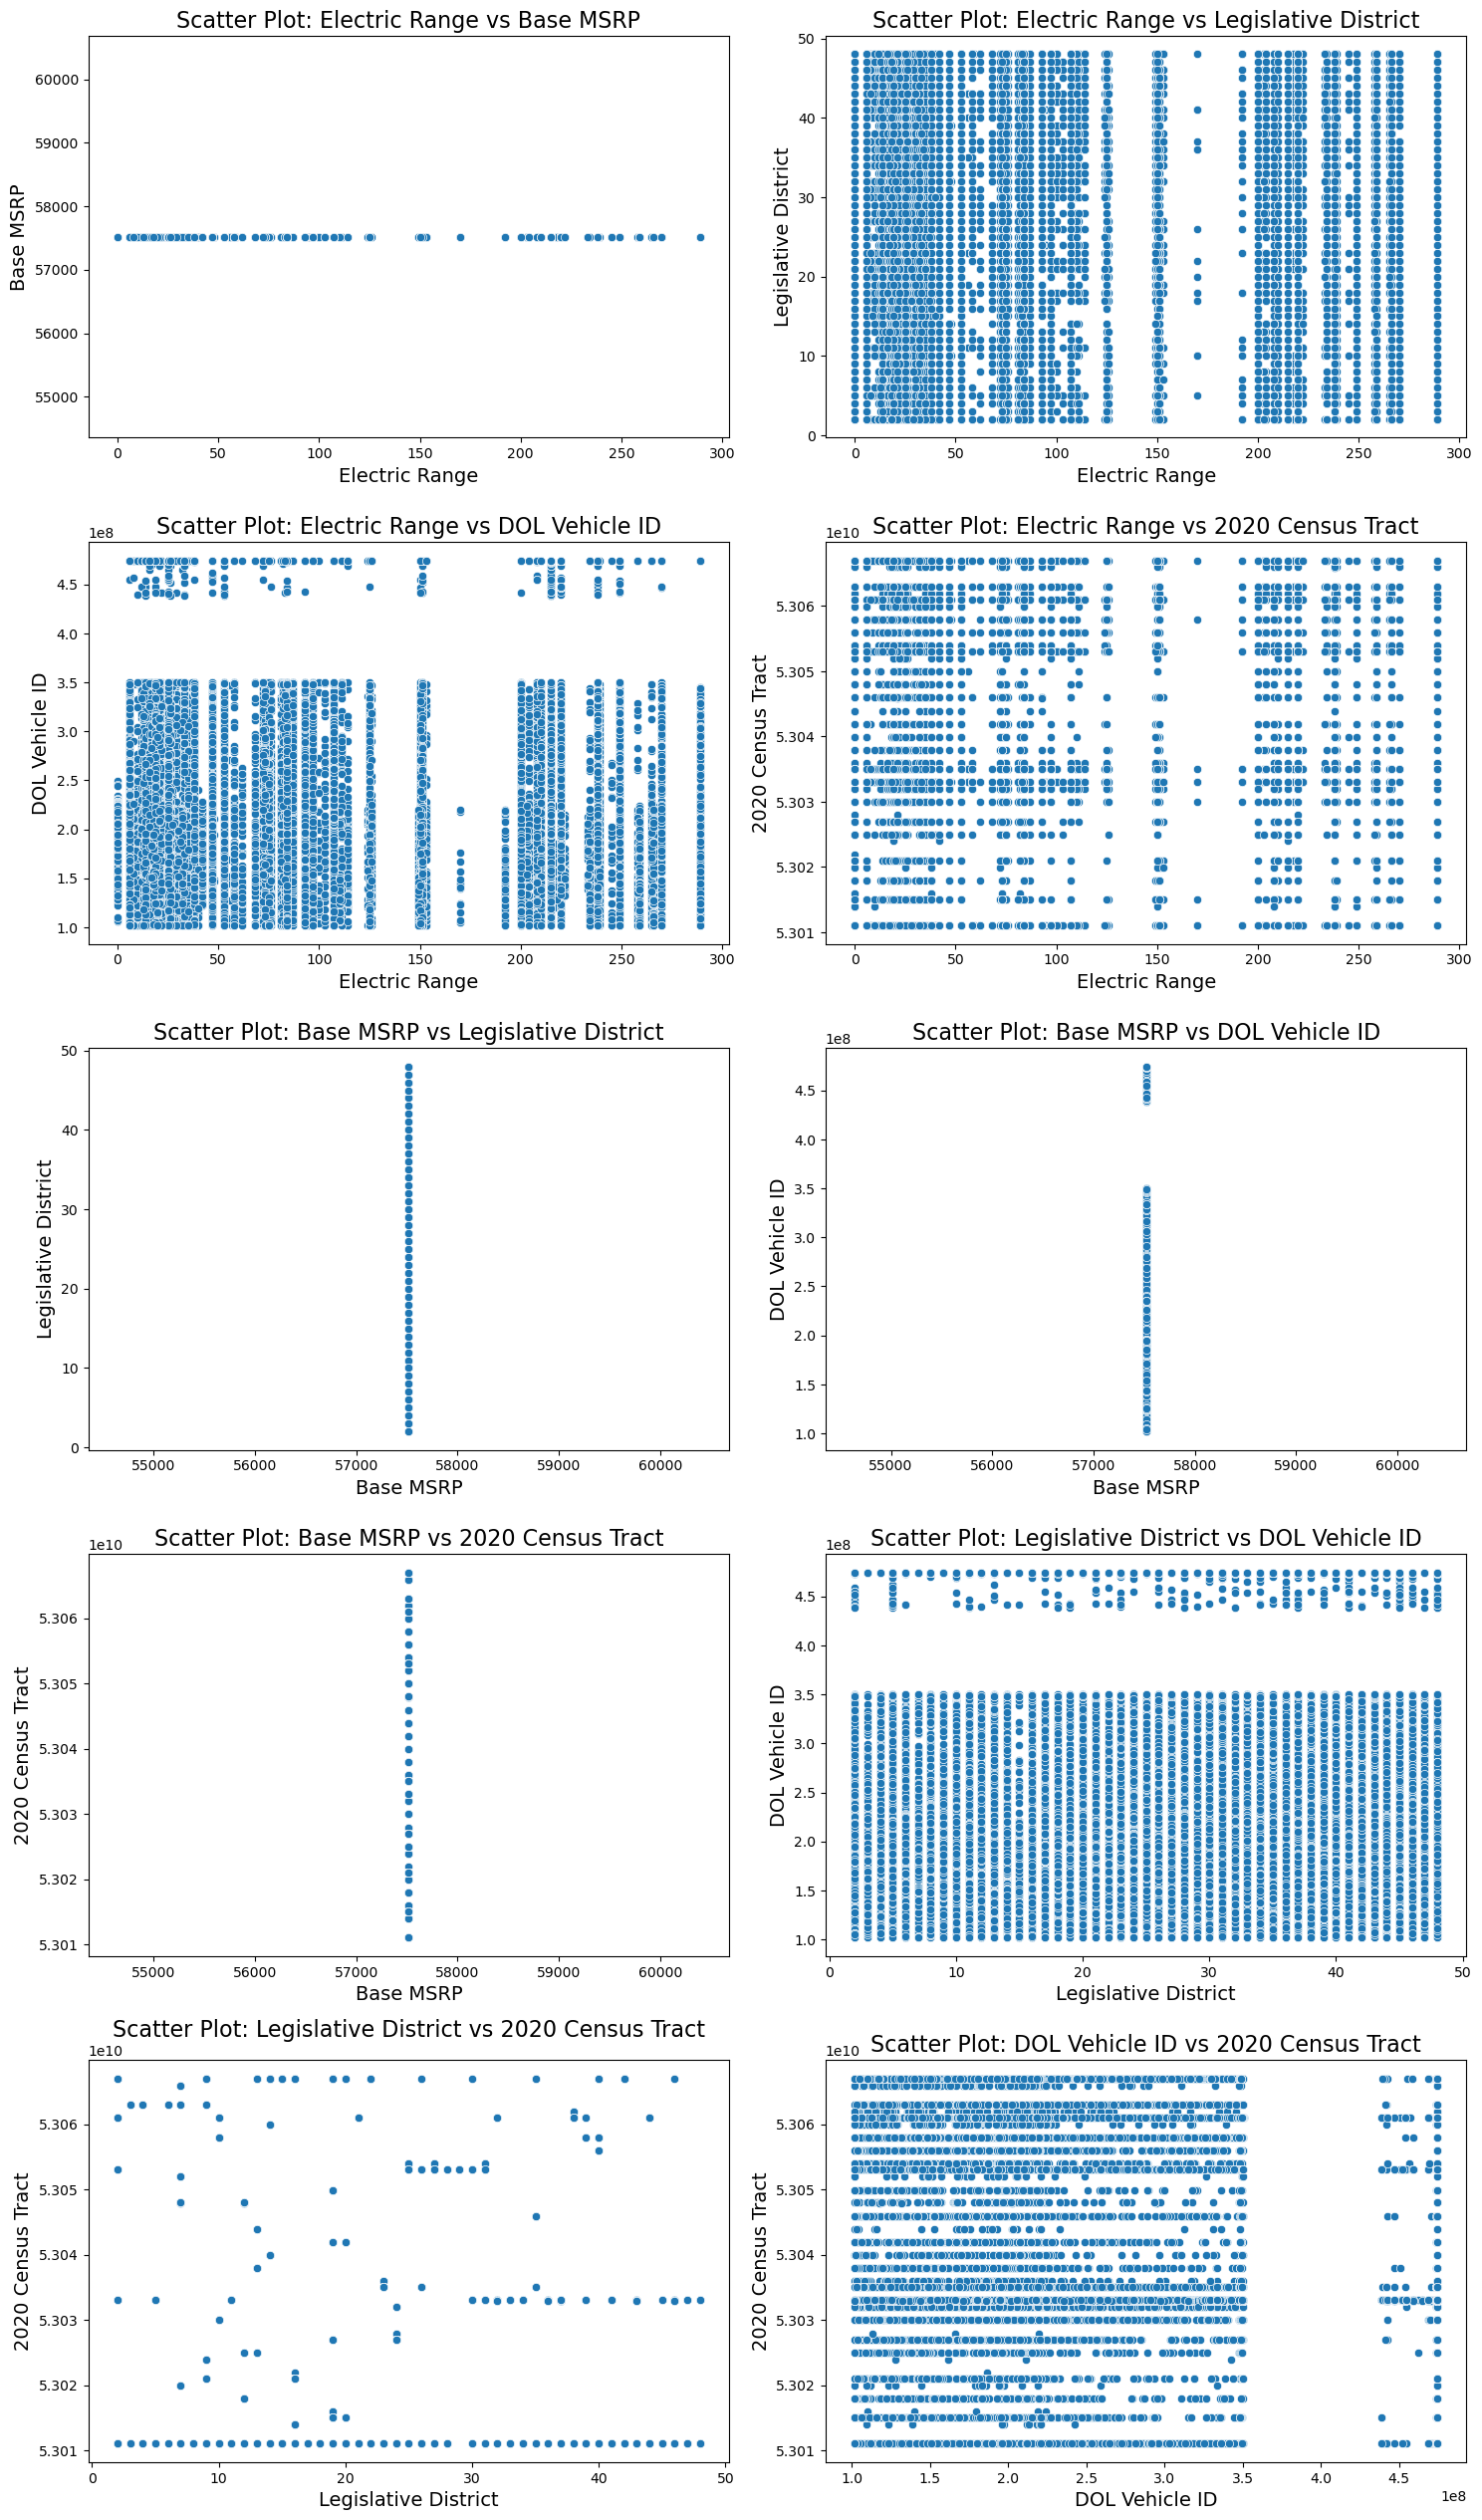

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define the number of columns per row for scatter plots
n_cols = 2
n_rows = (len(numerical_cols) * (len(numerical_cols) - 1)) // 2 // n_cols + 1

# Create a figure with a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Initialize index for axes
index = 0

# Loop through pairs of numerical columns to create scatter plots
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        sns.scatterplot(data=df, x=numerical_cols[i], y=numerical_cols[j], ax=axes[index])
        axes[index].set_title(f'Scatter Plot: {numerical_cols[i]} vs {numerical_cols[j]}', fontsize=16)
        axes[index].set_xlabel(numerical_cols[i], fontsize=14)
        axes[index].set_ylabel(numerical_cols[j], fontsize=14)
        index += 1
        if index >= len(axes):  # Stop if all axes are used
            break
    if index >= len(axes):  # Stop outer loop if all axes are used
        break

# Remove any unused subplots
for j in range(index, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### Insights


* Battery Electric Vehicles (BEVs) have an average electric range of 105.37 miles and a base MSRP of 1,617.55(dollars), while Plug-in Hybrid Electric Vehicles (PHEVs) have a significantly lower average range of 31.00 miles and a higher average MSRP of 2,362.62(dollars). 
* The average prices appear unusually low and should be verified for accuracy.

* Overall, the analysis reveals that the correlations among the numerical variables (Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, and 2020 Census Tract) are either very weak or negligible. 
* This suggests that these variables do not exhibit significant relationships or associations with each other, indicating that other factors may be influencing the electric range and MSRP of electric vehicles.03, respectively).

## NUmerical Columns vs Electric Vehicle Type

## Using Anova Test

In [24]:

import pandas as pd
import scipy.stats as stats


categorical_col = 'Electric Vehicle Type'

# Ensure the categorical variable is treated as a category
df[categorical_col] = df[categorical_col].astype('category')

# Create an empty DataFrame to store results
anova_results = pd.DataFrame(columns=['Variable', 'F-Value', 'p-Value', 'Relationship'])

# Loop through each numerical column to perform ANOVA
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for num_col in numerical_cols:
    # Check if the column is not the target variable
    if num_col != categorical_col:
        # Create groups based on the categorical variable
        groups = [group[num_col].dropna() for name, group in df.groupby(categorical_col)]
        
        # Perform ANOVA
        f_value, p_value = stats.f_oneway(*groups)
        
        # Determine relationship interpretation based on p-values
        if p_value < 0.05:
            relationship = 'Strong'
        elif p_value < 0.1:
            relationship = 'Weak'
        else:
            relationship = 'No Relationship'
        
        # Append results to the DataFrame
        anova_results = anova_results.append({
            'Variable': num_col,
            'F-Value': f_value,
            'p-Value': p_value,
            'Relationship': relationship
        }, ignore_index=True)

# Display the ANOVA results
anova_results


C:\Users\mdimr\AppData\Local\Temp\ipykernel_9096\4277184515.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({
C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\mdimr\AppData\Local\Temp\ipykernel_9096\4277184515.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({
C:\Users\mdimr\AppData\Local\Temp\ipykernel_9096\4277184515.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({
C:\Users\mdimr\AppData\Local\Temp

Variable       F-Value       p-Value     Relationship
0        Electric Range  11925.879799  0.000000e+00           Strong
1             Base MSRP           NaN           NaN  No Relationship
2  Legislative District    321.248653  9.746081e-72           Strong
3        DOL Vehicle ID     18.760118  1.483628e-05           Strong
4     2020 Census Tract     39.248362  3.745238e-10           Strong

## Using  Boxplot

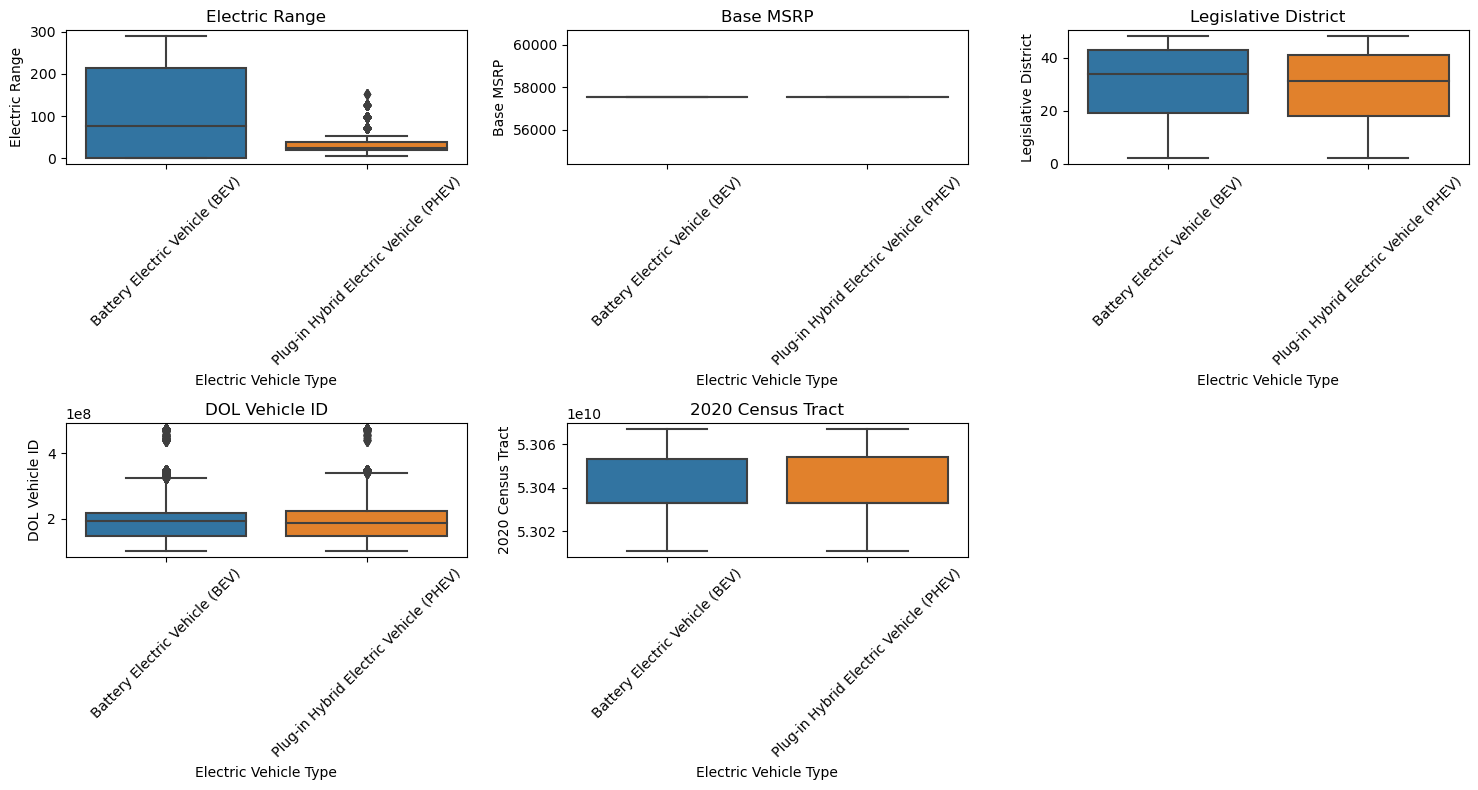

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_cols = df.select_dtypes(include='number').columns.tolist()
categorical_col = 'Electric Vehicle Type'

# Set up the plot
plt.figure(figsize=(15, 8))

# Create a box plot for each numerical variable grouped by the categorical variable
for i, variable in enumerate(numerical_cols):
    # Calculate the IQR to filter out outliers
    Q1 = df[variable].quantile(0.05)
    Q3 = df[variable].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to exclude outliers
    filtered_data = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]

    plt.subplot(2, 3, i + 1)  # Create a subplot for each variable
    sns.boxplot(x=categorical_col, y=variable, data=filtered_data)
    plt.title(variable)
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


## Categorical Columns vs Electric Vehicle Type

## Using ChiSquare Test

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency


categorical_pairs = [
    ('Make', 'Electric Vehicle Type'),
    ('Model', 'Electric Vehicle Type'),
    ('Electric Utility', 'Electric Vehicle Type'),
    ('County', 'Electric Vehicle Type'),
    ('City', 'Electric Vehicle Type'),
    ('State', 'Electric Vehicle Type'),
    ('Model Year', 'Electric Vehicle Type')
]

# Initialize a list to store the Chi-Square test results
chi_square_results = []

# Loop through each pair of categorical variables
for col1, col2 in categorical_pairs:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Perform Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Append the results to the list
    chi_square_results.append({
        'Variable 1': col1,
        'Variable 2': col2,
        'Chi-Square Statistic': chi2_stat,
        'p-Value': p_value,
        'Degrees of Freedom': dof,
        'Significant Relationship': p_value < 0.05  # Assuming alpha = 0.05
    })

# Create a DataFrame from the Chi-Square results
chi_square_df = pd.DataFrame(chi_square_results)

# Display the resulting DataFrame
chi_square_df


Variable 1             Variable 2  Chi-Square Statistic  \
0              Make  Electric Vehicle Type          71595.327861   
1             Model  Electric Vehicle Type         107391.378643   
2  Electric Utility  Electric Vehicle Type           1469.211703   
3            County  Electric Vehicle Type           1864.159538   
4              City  Electric Vehicle Type           3194.524689   
5             State  Electric Vehicle Type             84.926107   
6        Model Year  Electric Vehicle Type           8969.762550   

         p-Value  Degrees of Freedom  Significant Relationship  
0   0.000000e+00                  33                      True  
1   0.000000e+00                 113                      True  
2  1.921202e-259                  72                      True  
3  1.011162e-285                 164                      True  
4   0.000000e+00                 628                      True  
5   2.079787e-04                  44                      True  
6   0.000000e+00                  19                      True

## Visualization- Grouped Bar Chart

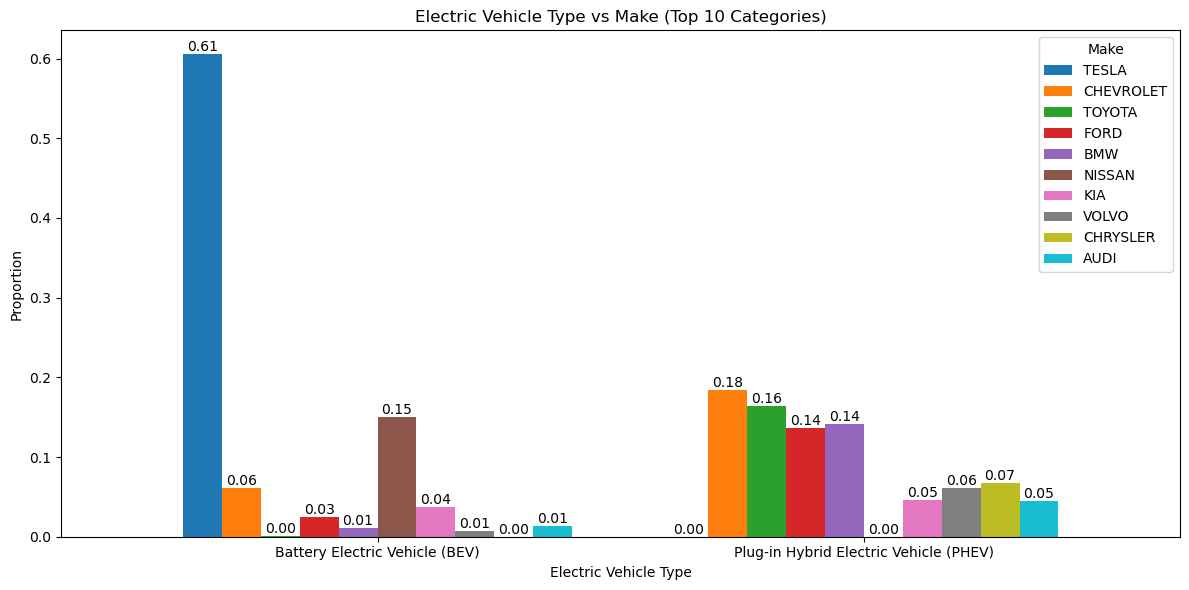

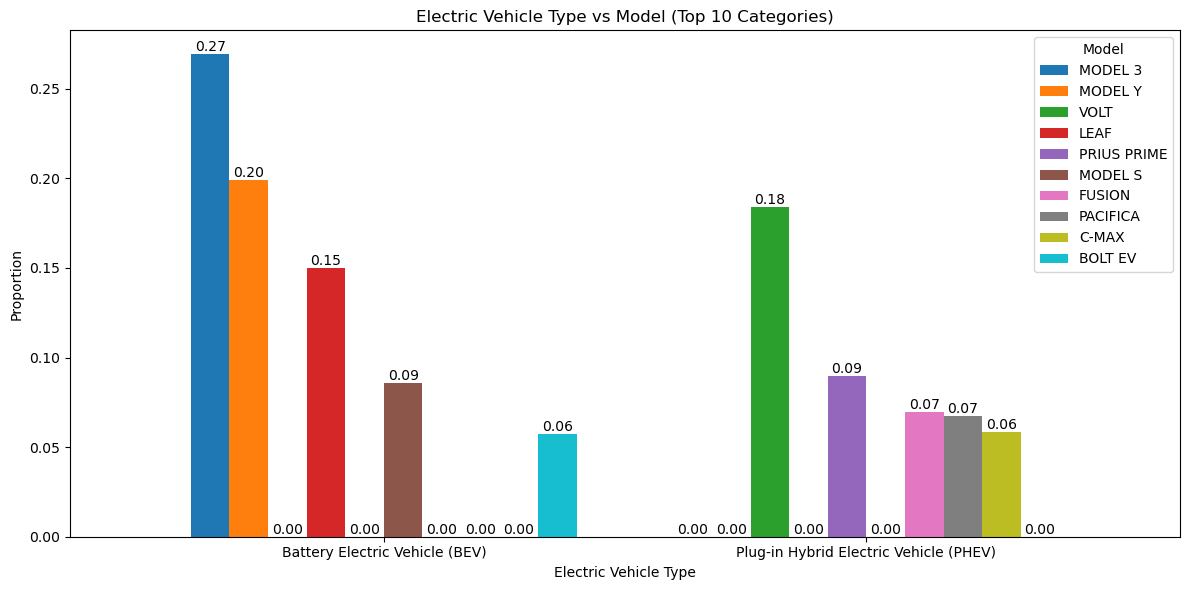

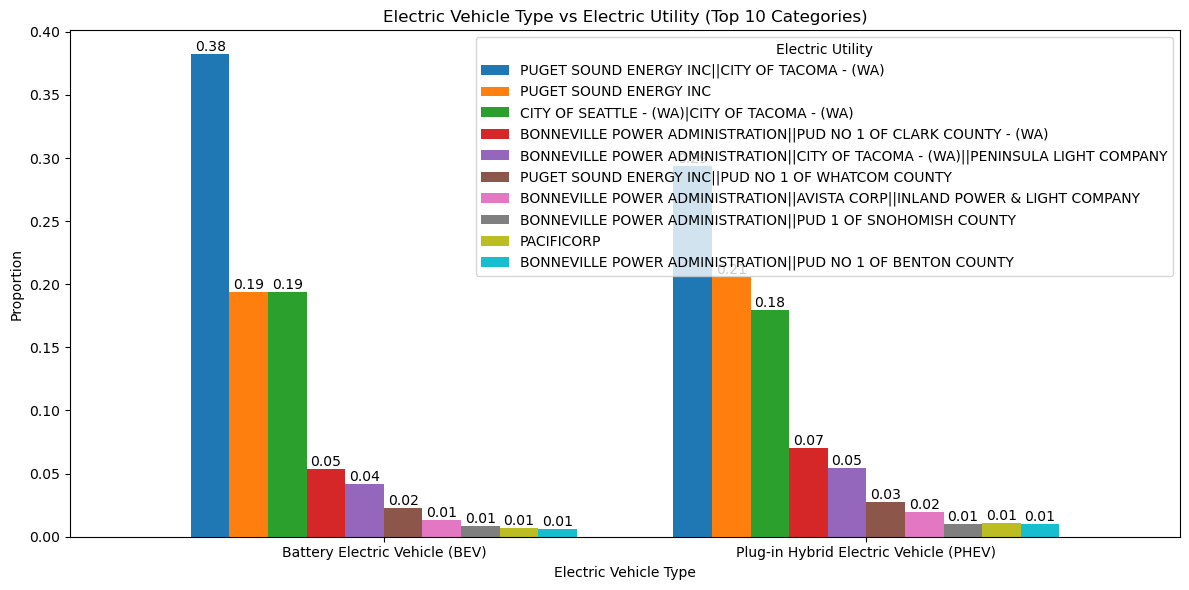

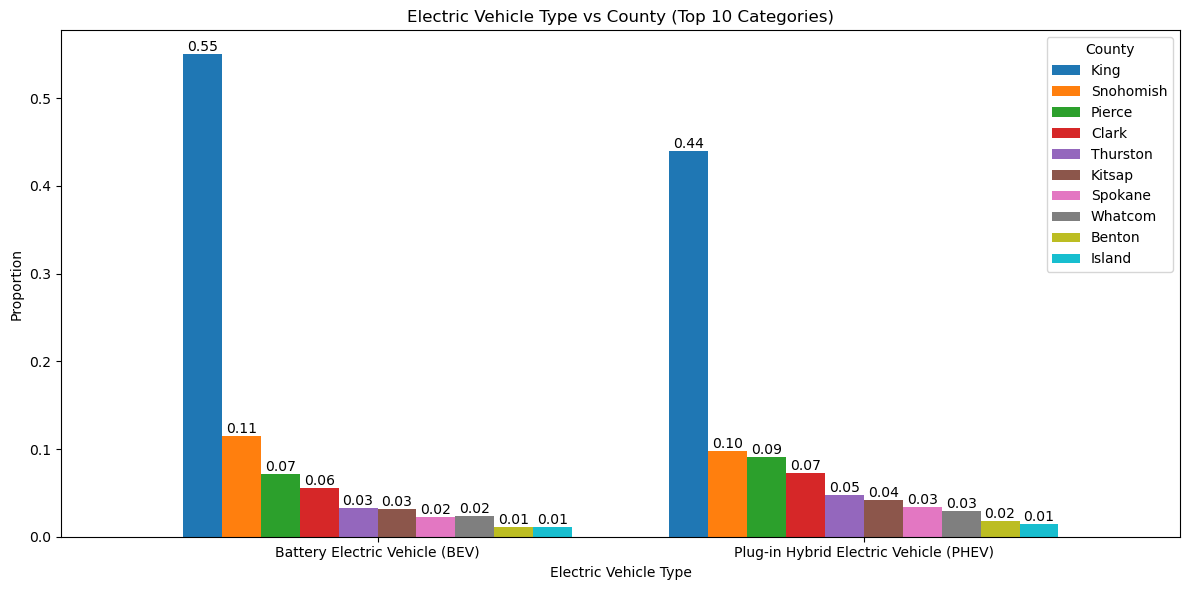

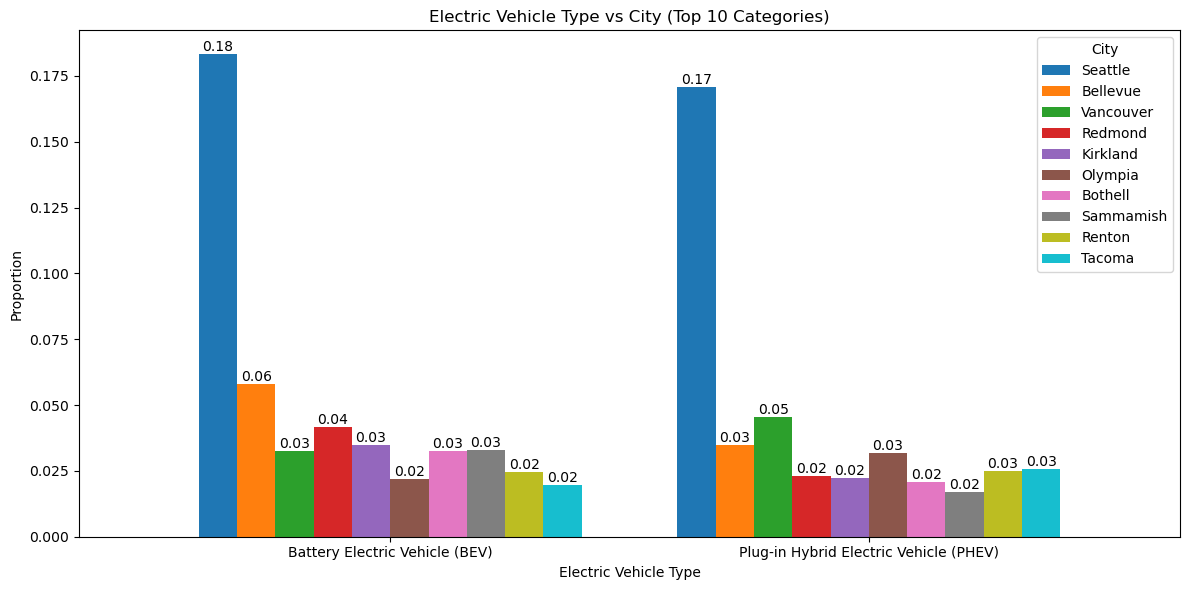

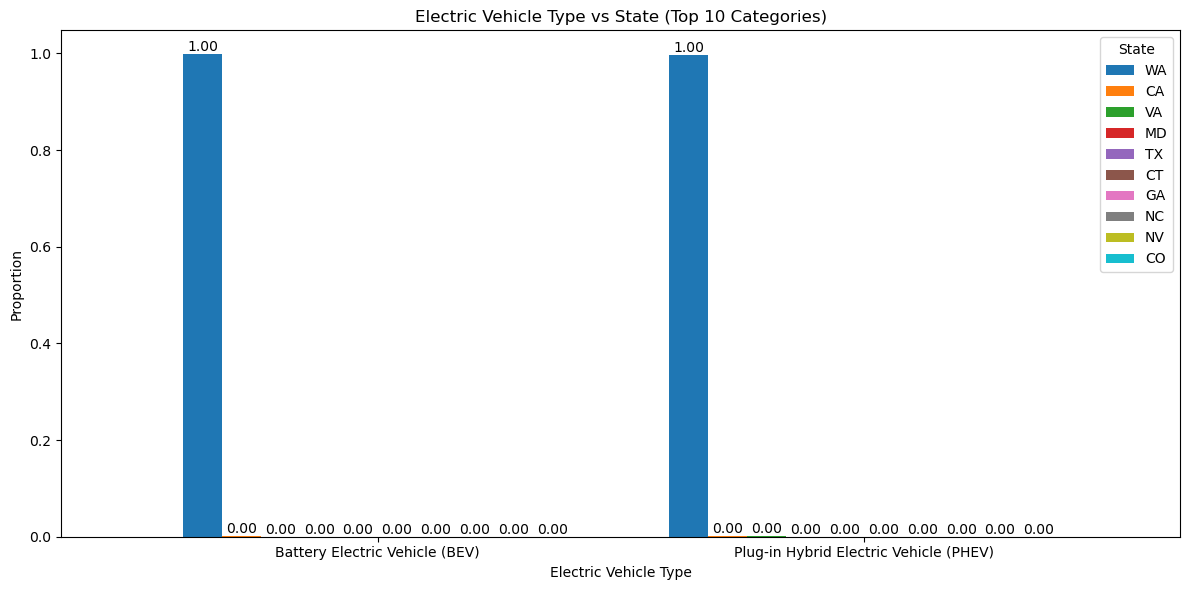

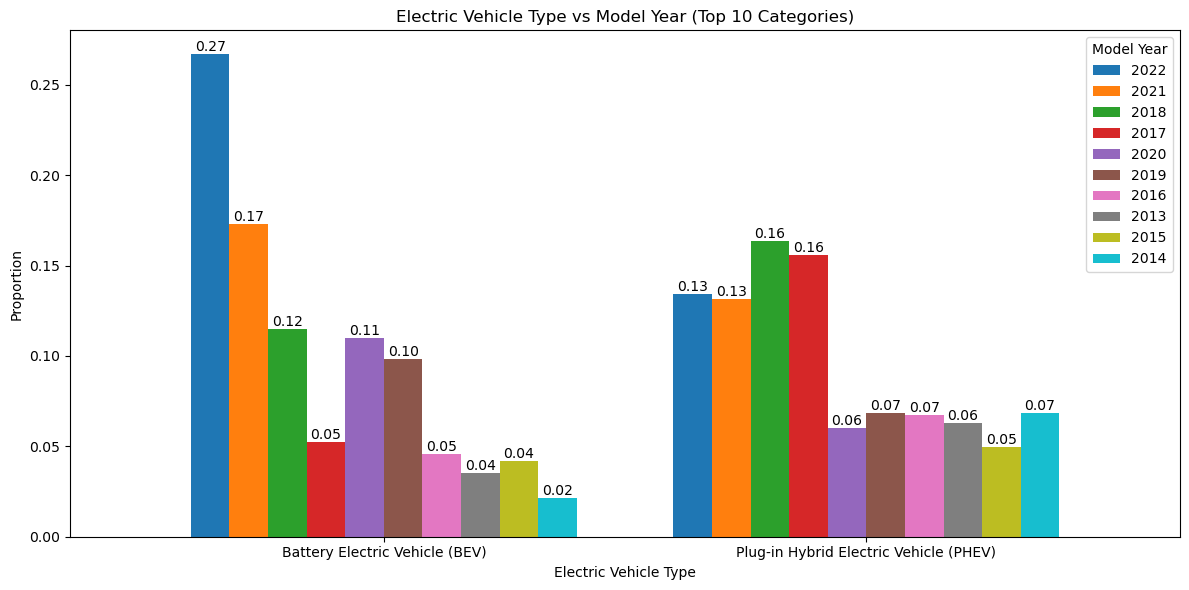

In [27]:
import pandas as pd
import matplotlib.pyplot as plt



# Columns to analyze
categorical_columns = [
    'Make', 'Model', 'Electric Utility', 'County', 'City', 'State', 'Model Year'
]

# Create crosstabs and plot
for column in categorical_columns:
    # Create a crosstab
    tab = pd.crosstab(df['Electric Vehicle Type'], df[column], normalize='index')
    
    # Select the top 10 categories based on the total counts
    top_categories = tab.sum(axis=0).nlargest(10).index
    filtered_tab = tab[top_categories]
    
    # Plotting
    ax = filtered_tab.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title(f'Electric Vehicle Type vs {column} (Top 10 Categories)')
    plt.xlabel('Electric Vehicle Type')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    
    # Adding percentage above bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


### Insights 

* From Grouped bar Chart and The Chi-Square test results indicate significant relationships between Electric Vehicle Type and various categorical variables such as Make, Model, Electric Utility, County, City, State, and Model Year. 
* This suggests that vehicle preferences and availability are influenced by factors like brand, local policies, and geographic location. Policymakers and marketers should leverage these insights to promote electric vehicle adoption effectively and develop targeted strategies based on regional and demographic differences.

### Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.


In [28]:
state_counts = df['State'].value_counts().reset_index()

state_counts.columns = ['State', 'Count']

fig = px.choropleth( state_counts, 
        locations='State',   
        locationmode='USA-states',  # This specifies that the locations are US states
        color='Count', 
        color_continuous_scale=px.colors.sequential.Plasma,
        scope='usa')

fig.show()


### Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.


In [29]:
d = df.groupby(['Make', 'Model Year']).size().reset_index(name='Number_of_Vehicles')

px.bar(d, x='Number_of_Vehicles', y='Make', color='Make', animation_frame='Model Year', orientation='h',
       title='EV Makes and Their Count Over the Years', range_x=[0, 3000]).update_traces(
    texttemplate='%{x}', textposition='outside').update_layout(
    yaxis_title='EV Makes', xaxis_title='Number of EV Vehicles', title_x=0.5, width=800, height=600).show()
